## Predicting House Sale Prices

### 1. Reading in DataFrame, first test..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

In [2]:
# Reading in pandas.DataFrame AmesHousing.csv
df = pd.read_csv("AmesHousing.tsv",delimiter="\t")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.shape[0]//2

1465

In [4]:
def transform_features(df):
    return df[:df.shape[0]//2].copy()

In [5]:
def select_features(df,features=["Gr Liv Area"]):
    train = transform_features(df)
    return list(train[features].columns)
    

In [6]:
def train_and_test(df,features,target="SalePrice",k=0):
    if k==1:
        np.random.seed(1)
        shuffled_index = np.random.permutation(df.index)
        df = df.loc[shuffled_index,:]
        train = df[:df.shape[0]//2]
        test = df[df.shape[0]//2:]
        lr = LinearRegression()
        lr.fit(train[select_features(df,features=features)]\
           ,train[target])
        predictions_test = lr.predict\
        (test[select_features(df,features=features)])
        
        rmse_test = mean_squared_error\
        (test[target],predictions_test)**0.5
        
        lr2 = LinearRegression()
        lr2.fit(test[select_features(df,features=features)]\
           ,test[target])
        predictions_train = lr2.predict\
        (train[select_features(df,features=features)])
        rmse_train = mean_squared_error\
        (train[target],predictions_train)**0.5
              
        return (rmse_train + rmse_test)/2
    
    elif k==0:
        train = df[:df.shape[0]//2]
        test = df[df.shape[0]//2:]
        lr = LinearRegression()
        lr.fit(train[select_features(df,features=features)]\
           ,train[target])
        predictions_test = lr.predict\
        (test[select_features(df,features=features)])
        rmse_test = mean_squared_error\
        (test[target],predictions_test)**0.5
        return rmse_test
    
    elif k>1:
        lr = LinearRegression()
        kf = KFold(k, shuffle=True,\
                   random_state=None)
        mses = cross_val_score(lr,\
                df[features],\
                df[target],\
            scoring=make_scorer(mean_squared_error),cv=kf)
        
        rmses = [(abs(j))**0.5 for j in mses]
        #print(rmses)
        avg_rmse = np.mean(rmses)
        return avg_rmse

In [7]:
# First testing
train_and_test(df,features=["Gr Liv Area"])

57120.50729008638

In [8]:
# Outside functions, testing the last result with 
#a sequence of delarations

lr = LinearRegression()
train = df[:df.shape[0]//2]
test1 = df[df.shape[0]//2:]
test = test1.copy()

dic = {}
for i,v in enumerate(test.index):
    dic[v] = i
test.rename(dic,axis=0,inplace=True)
test.drop(labels="Order",inplace=True,axis=1)

features = select_features(df)
lr.fit(train[features],train["SalePrice"])
pred_train = lr.predict(train[features])
pred_test = lr.predict(test[features])

df_pred1 = pd.DataFrame(data=pred_train,columns=["pred_train"])
df_pred2 = pd.DataFrame(data=pred_test,columns=["pred_test"])
lista_de_dfs = [df_pred1,train["SalePrice"],df_pred2,test["SalePrice"].reindex()]

comparissions = pd.DataFrame()
print(type(comparissions))

for item in lista_de_dfs: 
    comparissions = pd.concat([comparissions,item],axis=1)
    
#print(comparissions.head())

df_pred2["real_prices"] = test["SalePrice"]
df_pred2["errors"] = df_pred2["real_prices"]-df_pred2["pred_test"]
df_pred2["squared_errors"] = df_pred2["errors"]**2
print((df_pred2["squared_errors"].sum()/df_pred2.shape[0])**0.5)

<class 'pandas.core.frame.DataFrame'>
57120.50729008638


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [10]:
#gross informations about the dataset

text_of_columns_info = """
Order;        2930; non-null ;int64 ;
PID;     2930; non-null ;int64 ;
MS SubClass;    2930; non-null ;int64 ;
MS Zoning;   2930; non-null ;object;
Lot Frontage;  2440; non-null ;float64;
Lot Area;  2930; non-null ;int64;
Street;  2930; non-null ;object;
Alley;  198 ;non-null ;object;
Lot Shape;  2930; non-null; object;
Land Contour;  2930; non-null ;object;
Utilities;  2930; non-null ;object;
Lot Config;  2930; non-null ;object;
Land Slope; 2930; non-null ;object;
Neighborhood; 2930; non-null ;object;
Condition 1; 2930; non-null ;object;
Condition 2; 2930; non-null ;object;
Bldg Type;  2930; non-null ;object;
House Style;  2930; non-null ;object;
Overall Qual;  2930; non-null ;int64;
Overall Cond;  2930; non-null ;int64;
Year Built;  2930; non-null ;int64;
Year Remod/Add; 2930; non-null ;int64;
Roof Style; 2930; non-null ;object;
Roof Matl; 2930; non-null ;object;
Exterior 1st;  2930; non-null ;object;
Exterior 2nd;  2930; non-null ;object;
Mas Vnr Type;  2907; non-null ;object;
Mas Vnr Area;  2907; non-null ;float64;
Exter Qual;  2930; non-null ;object;
Exter Cond;  2930; non-null ;object;
Foundation;   2930; non-null ;object;
Bsmt Qual;   2850; non-null ;object;
Bsmt Cond;   2850; non-null ;object;
Bsmt Exposure;  2847; non-null ;object;
BsmtFin Type 1;  2850; non-null ;object;
BsmtFin SF 1;   2929; non-null ;float64;
BsmtFin Type 2;  2849; non-null ;object;
BsmtFin SF 2;  2929; non-null ;float64;
Bsmt Unf SF;  2929; non-null ;float64;
Total Bsmt SF;   2929; non-null ;float64;
Heating;   2930; non-null ;object;
Heating QC;   2930; non-null ;object;
Central Air;   2930; non-null ;object;
Electrical;   2929; non-null ;object;
1st Flr SF;   2930 ;non-null ;int64;
2nd Flr SF;   2930; non-null ;int64;
Low Qual Fin SF;  2930; non-null ;int64;
Gr Liv Area;  2930; non-null ;int64;
Bsmt Full Bath;  2928; non-null ;float64;
Bsmt Half Bath;  2928; non-null ;float64;
Full Bath;  2930; non-null ;int64;
Half Bath;  2930; non-null ;int64;
Bedroom AbvGr;  2930; non-null ;int64;
Kitchen AbvGr;  2930; non-null ;int64;
Kitchen Qual;  2930; non-null ;object;
TotRms AbvGrd;  2930; non-null ;int64;
Functional;  2930; non-null ;object;
Fireplaces;  2930; non-null ;int64;
Fireplace Qu;  1508; non-null ;object;
Garage Type;  2773; non-null ;object;
Garage Yr Blt; 2771; non-null ;float64;
Garage Finish;  2771; non-null ;object;
Garage Cars;  2929; non-null ;float64;
Garage Area;  2929; non-null ;float64;
Garage Qual;  2771; non-null ;object;
Garage Cond;  2771; non-null ;object;
Paved Drive;  2930; non-null ;object;
Wood Deck SF;  2930; non-null ;int64;
Open Porch SF;  2930; non-null ;int64;
Enclosed Porch;  2930; non-null ;int64;
3Ssn Porch;  2930; non-null ;int64;
Screen Porch;  2930; non-null ;int64;
Pool Area;  2930; non-null ;int64;
Pool QC;  13; non-null ;object;
Fence;  572; non-null ;object;
Misc Feature;  106; non-null ;object;
Misc Val;  2930; non-null ;int64;
Mo Sold;  2930 ;non-null ;int64;
Yr Sold;  2930; non-null ;int64;
Sale Type;  2930; non-null ;object;
Sale Condition;  2930; non-null ;object;
SalePrice;  2930; non-null ;int64"""

In [12]:
cols_info = text_of_columns_info.split(";")
cols_info[:30]

['\nOrder',
 '        2930',
 ' non-null ',
 'int64 ',
 '\nPID',
 '     2930',
 ' non-null ',
 'int64 ',
 '\nMS SubClass',
 '    2930',
 ' non-null ',
 'int64 ',
 '\nMS Zoning',
 '   2930',
 ' non-null ',
 'object',
 '\nLot Frontage',
 '  2440',
 ' non-null ',
 'float64',
 '\nLot Area',
 '  2930',
 ' non-null ',
 'int64',
 '\nStreet',
 '  2930',
 ' non-null ',
 'object',
 '\nAlley',
 '  198 ']

In [13]:
# CLEANING DATA INFO 

new_info = []
provisory_list = []
cont = 0
for item in cols_info:
    cont += 1
    provisory_list.append(item)
    if cont == 4:
        provisory_list[0] = provisory_list[0].replace("\n","")
        provisory_list[1] = int(provisory_list[1].replace(" ",""))
        provisory_list[2] = provisory_list[2].replace(" ","")
        provisory_list[3] = provisory_list[3].replace(" ","")
        new_info.append(provisory_list)
        cont=0
        provisory_list = []
#print(new_info)

matrix = np.array(new_info)
#print(matrix)
columns = ["column","non_null_rows","null/non_null","dtype"]
features_info = pd.DataFrame(data=matrix,columns=columns)
features_info["non_null_rows"] = \
features_info["non_null_rows"].astype(float)

features_info.head()

,column,non_null_rows,null/non_null,dtype
0,Order,2930.0,non-null,int64
1,PID,2930.0,non-null,int64
2,MS SubClass,2930.0,non-null,int64
3,MS Zoning,2930.0,non-null,object
4,Lot Frontage,2440.0,non-null,float64


In [14]:
features_info["non_null_rows"].dtypes

dtype('float64')

In [15]:
numeric_columns = features_info.loc\
[(features_info["dtype"]=="float64")|\
(features_info["dtype"]=="int64")]

numeric_columns.shape

(39, 4)

In [16]:
numeric_columns_names = numeric_columns["column"].tolist()
len(numeric_columns_names)

39

In [17]:
numeric_columns.loc[numeric_columns["non_null_rows"]<2930]\
.sort_values(by="non_null_rows",ascending=True)

,column,non_null_rows,null/non_null,dtype
4,Lot Frontage,2440.0,non-null,float64
60,Garage Yr Blt,2771.0,non-null,float64
27,Mas Vnr Area,2907.0,non-null,float64
48,Bsmt Full Bath,2928.0,non-null,float64
49,Bsmt Half Bath,2928.0,non-null,float64
35,BsmtFin SF 1,2929.0,non-null,float64
37,BsmtFin SF 2,2929.0,non-null,float64
38,Bsmt Unf SF,2929.0,non-null,float64
39,Total Bsmt SF,2929.0,non-null,float64
62,Garage Cars,2929.0,non-null,float64


#### Numeric_cols treatment:

#### Columns with null values:
- Lot Frontage ----> 2440 non-null  ( < 16% of null values)
- Garage Yr Blt ----> 2771.0 non-null( < 6% of null values)
- Mas Vnr Area ----> 2907.0 non-null( < 0.8% of null values)
- Bsmt Full Bath ----> 2928.0 non-null( < 0.07% of null values)
- Bsmt Half Bath ----> 2928.0 non-null (< 0.07% of null values)

<i> Since the less value in the "non-null value" column is 2440 (this is more than an 83% of non-null values) i'll fill all null values with the mean of the column. 


In [18]:
df[numeric_columns_names] = \
df[numeric_columns_names].fillna(\
            df[numeric_columns_names].mean())

In [19]:
# Checking if now all the numeric columns in df are not null
df[numeric_columns_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
Lot Frontage       2930 non-null float64
Lot Area           2930 non-null int64
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Mas Vnr Area       2930 non-null float64
BsmtFin SF 1       2930 non-null float64
BsmtFin SF 2       2930 non-null float64
Bsmt Unf SF        2930 non-null float64
Total Bsmt SF      2930 non-null float64
1st Flr SF         2930 non-null int64
2nd Flr SF         2930 non-null int64
Low Qual Fin SF    2930 non-null int64
Gr Liv Area        2930 non-null int64
Bsmt Full Bath     2930 non-null float64
Bsmt Half Bath     2930 non-null float64
Full Bath          2930 non-null int64
Half Bath          2930 non-null int64
Bedroom AbvGr      

In [20]:
not_numeric_columns = features_info.loc\
[(features_info["dtype"]!="float64")&\
(features_info["dtype"]!="int64")]

not_numeric_columns_names = not_numeric_columns["column"].tolist()
len(not_numeric_columns_names)

43

In [21]:
not_numeric_columns.loc[not_numeric_columns["non_null_rows"]<2930]\
.sort_values(by="non_null_rows",ascending=True)

,column,non_null_rows,null/non_null,dtype
73,Pool QC,13.0,non-null,object
75,Misc Feature,106.0,non-null,object
7,Alley,198.0,non-null,object
74,Fence,572.0,non-null,object
58,Fireplace Qu,1508.0,non-null,object
61,Garage Finish,2771.0,non-null,object
64,Garage Qual,2771.0,non-null,object
65,Garage Cond,2771.0,non-null,object
59,Garage Type,2773.0,non-null,object
33,Bsmt Exposure,2847.0,non-null,object


#### Non numerical columns, non-null values:

Columns with null values:
- Pool QC ----> 13 non-null ( > 99% of null values)
- Misc Feature ----> 106 non-null ( > 96% of null values)
- Alley ----> 198 non-null ( > 93% of null values)
- Fence ----> 572 non-null (> 80% of null values)
- Fireplace Qu ----> 1508 non-null (~ 50% of null values)

All these columns must be eliminated.

In [22]:
drop_columns = ["Pool QC","Misc Feature",\
                "Alley","Fence","Fireplace Qu"]
df.drop(drop_columns,inplace=True,axis=1)

### 2. Selecting features

The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

### Interesting columns:

##### Interesting nominal columns: 
["Foundation","MS Zoning","Neighborhood","Exterior 1st","Roof Matl"]

- Foundation: 6 unique values
- MS Zoning: 8 unique values
- Neighborhood: 28 unique values
- Exterior 1st: 16 unique values
- Roof Matl: 8 unique values

##### Interesting ordinal columns: 
["Overall Qual","Overall Cond","Heating QC", "Electrical","Utilities"]

1. Overall Qual {"Very Excellent":10,"Excellent":9,"Very Good":8,"Good":7,"Above Average":6,"Average":5,"Below Average":4,"Fair":3,"Poor":2,"Very Poor":1} 
2. Overall Cond {"Very Excellent":10,"Excellent":9,"Very Good":8,"Good":7,"Above Average":6,"Average":5,"Below Average":4,"Fair":3,"Poor":2,"Very Poor":1}
3. HeatingQC {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
4. Electrical {"Mix":1,"FuseP":2,"FuseF":3,"FuseA":4,"SBrkr":5}
5. Utilities {"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4}

##### Interesting discrete columns: 
["Year Built","Year Remod/Add","Full Bath","Bedroom AbvGr","TotRms AbvGrd"]


##### Interesting continuous columns: 
all continuous = ["Lot Frontage","Lot Area",\
"Mas Vnr Area","BsmtFin SF 1","BsmtFin SF 2","Bsmt Unf SF",\
"Total Bsmt SF","1st Flr SF","2nd Flr SF","Low Qual Fin SF",\
"Gr Liv Area","Garage Area","Wood Deck SF",\
"Open Porch SF","Enclosed Porch","3-Ssn Porch","Screen Porch",\
"Pool Area","Misc Val"]

interestings ones = ["Lot Frontage","Lot Area","Total Bsmt SF","Gr Liv Area"]

In [23]:
nominal_columns = ["Foundation","MS Zoning",\
"Neighborhood","Exterior 1st","Roof Matl"]

ordinal_columns = ["Overall Qual","Overall Cond",\
                   "Heating QC",\
                   "Electrical","Utilities"]

discrete_columns = ["Year Built","Year Remod/Add",\
                    "Full Bath","Bedroom AbvGr","TotRms AbvGrd"]

continuous_columns = ["Lot Frontage","Lot Area",\
                      "Total Bsmt SF","Gr Liv Area"]

In [24]:
interesting_features = nominal_columns+\
ordinal_columns+discrete_columns+\
continuous_columns

df[interesting_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 19 columns):
Foundation        2930 non-null object
MS Zoning         2930 non-null object
Neighborhood      2930 non-null object
Exterior 1st      2930 non-null object
Roof Matl         2930 non-null object
Overall Qual      2930 non-null int64
Overall Cond      2930 non-null int64
Heating QC        2930 non-null object
Electrical        2929 non-null object
Utilities         2930 non-null object
Year Built        2930 non-null int64
Year Remod/Add    2930 non-null int64
Full Bath         2930 non-null int64
Bedroom AbvGr     2930 non-null int64
TotRms AbvGrd     2930 non-null int64
Lot Frontage      2930 non-null float64
Lot Area          2930 non-null int64
Total Bsmt SF     2930 non-null float64
Gr Liv Area       2930 non-null int64
dtypes: float64(2), int64(9), object(8)
memory usage: 435.0+ KB



#### Only one null value remains in the "Electric" column. We are going to eliminate the entire row corresponding to that value.

In [25]:
df.loc[df["Electrical"].isnull()]
df.drop([1577],inplace=True,axis=0)

In [26]:
df[interesting_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 2929
Data columns (total 19 columns):
Foundation        2929 non-null object
MS Zoning         2929 non-null object
Neighborhood      2929 non-null object
Exterior 1st      2929 non-null object
Roof Matl         2929 non-null object
Overall Qual      2929 non-null int64
Overall Cond      2929 non-null int64
Heating QC        2929 non-null object
Electrical        2929 non-null object
Utilities         2929 non-null object
Year Built        2929 non-null int64
Year Remod/Add    2929 non-null int64
Full Bath         2929 non-null int64
Bedroom AbvGr     2929 non-null int64
TotRms AbvGrd     2929 non-null int64
Lot Frontage      2929 non-null float64
Lot Area          2929 non-null int64
Total Bsmt SF     2929 non-null float64
Gr Liv Area       2929 non-null int64
dtypes: float64(2), int64(9), object(8)
memory usage: 457.7+ KB


### Now we have all the interesting columns without null values.

Then, we will perform a numerical translation in the ordinal columns. ("Overall Cond" and "Overall Qual" already have numerical ranks 1-10).

In [27]:
HeatingQC_dict =  {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}

Electrical_dict =  {"Mix":1,"FuseP":2,"FuseF":3,\
                       "FuseA":4,"SBrkr":5}
Utilities_dict =  {"ELO":1,"NoSeWa":2,"NoSewr":3,\
                   "AllPub":4}

In [28]:
df["Heating QC"] = df["Heating QC"].map(HeatingQC_dict)
df["Electrical"] = df["Electrical"].map(Electrical_dict)
df["Utilities"] = df["Utilities"].map(Utilities_dict)

In [29]:
features_prueba1 = continuous_columns+ordinal_columns
train_and_test(df,features=features_prueba1)

42413.36369600136

In [30]:
features_prueba2 = continuous_columns
train_and_test(df,features=features_prueba2)

54408.57952963582

In [31]:
features_prueba3 = ordinal_columns
train_and_test(df,features=features_prueba3)

49230.056099983594

In [32]:
# CREATING A COLUMN WITH YEARS OF ANTIGUATY
df["Antigüedad"] = df["Year Remod/Add"] - df["Year Built"]

# CREATING A COLUMN WITH Price per Gr Liv Area
df["Price_per_grlivarea"] = \
df["SalePrice"]/df["Gr Liv Area"]

df["Price_per_grlivarea"].head()

0    129.830918
1    117.187500
2    129.420617
3    115.639810
4    116.574586
Name: Price_per_grlivarea, dtype: float64

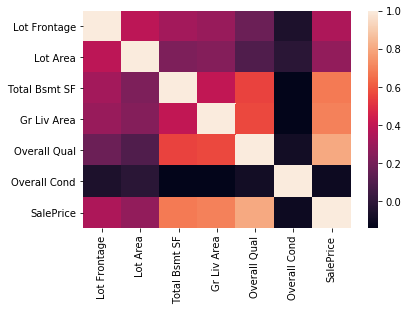

In [37]:

# MEASURING CORRELATIONS OF ORDINAL + CONTINUOUS (NUMERICAL FEATURES,
# (INCLUDING THE TARGET COLUMN "SalePrice")
datos = train[features_prueba1+["SalePrice"]].corr()
sns.heatmap(datos)
plt.show()

### Numerical features well correlated with "SalePrice" column:
- Total Bsmt SF: total basement square feet
- Gr Liv Area: Above grade living area (in square feet)
- Overall Qual: Overall quality. 

In [38]:
total_bsmt_sf_corr = df[["Total Bsmt SF","SalePrice"]].corr()
gr_liv_area_corr = df[["Gr Liv Area","SalePrice"]].corr()
ov_qual_corr = df[["Overall Qual","SalePrice"]].corr()

print(total_bsmt_sf_corr,gr_liv_area_corr,ov_qual_corr)

               Total Bsmt SF  SalePrice
Total Bsmt SF        1.00000    0.63227
SalePrice            0.63227    1.00000              Gr Liv Area  SalePrice
Gr Liv Area     1.000000   0.706777
SalePrice       0.706777   1.000000               Overall Qual  SalePrice
Overall Qual      1.000000   0.799304
SalePrice         0.799304   1.000000


In [39]:
strong_corr_numerical_features = ["Total Bsmt SF","Gr Liv Area",\
                           "Overall Qual"]

#### Nominal columns: searching interestings columns to expand categorical data

nominal_columns = ["Foundation","MS Zoning",\
"Neighborhood","Exterior 1st","Roof Matl"]

- Foundation: 6 unique values
- MS Zoning: 8 unique values
- Neighborhood: 28 unique values
- Exterior 1st: 16 unique values
- Roof Matl: 8 unique values

In [40]:
for column in nominal_columns:
    print(column+": ",df[column].value_counts(), "\n")

Foundation:  PConc     1309
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64 

MS Zoning:  RL         2272
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64 

Neighborhood:  NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      71
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64 

Exterior 1st:  VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2

#### Nominal columns (5 columns) analysis:

- No one of the columns has a value that appears in more than 95% of the time.
- No one of the columns has more than 100 possible categories.

### Possibles ways to measure correlations bewtwen the target column ("SalePrice") and the nominal features:
Hypothesis: Group by each category, then take the variance  (or his square root i.e. his standard deviation) of the corresponding target column, this variance must  be similar throgh each category. One way to measure this is taking again the variance (or his square root i.e. his standard deviation).

In [46]:
# Testing the hypothesis all nominal columns
# the target column to verify is "Price_per_grlivarea" i.e. 
# A kind of price per squar foot.

nominal_correlations = {}
for column in nominal_columns:
    valores = list(df[column].unique())
    std_values = []
    relative_std_values = []
    for valor in valores:
        df_test = df.loc[df[column]==valor]
    
        std_values.append((df_test["Price_per_grlivarea"].\
                          std()))
        relative_std_values.append(\
                df_test["Price_per_grlivarea"].std()\
                              /df_test.shape[0])
        std_value = pd.Series(std_values).std()
        relative_std_value = pd.Series(relative_std_values).std()
    
    nominal_correlations[column] = [std_value,relative_std_value]
    
df_nominal_correlations = pd.DataFrame\
(nominal_correlations,index=["std_value","relative_std_value"])
df_nominal_correlations.sort_values(axis=1,ascending=True,\
                                    by="relative_std_value")

,Foundation,Roof Matl,Neighborhood,Exterior 1st,MS Zoning
std_value,4.006207,2.651828,6.939978,9.738175,6.891335
relative_std_value,1.835127,2.199529,2.856653,3.364082,4.353668


The best candidate of the nominal features is "Neighborhood", this is because:
- "Roof Matl" has lower relative_std_value, but also very low variability and very low amount of unique values (see this in In[35]).
- The same happens with "Foundation" column (see this in In[35]).


#### Chi-Squared test (another approach):

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df2 = pd.get_dummies(df[nominal_columns])

# feature extraction
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(df2,df["SalePrice"])
# summarize scores
np.set_printoptions(precision=3)
chi_squared_scores = pd.Series(fit.scores_,index=\
                                  df2.columns)
print(chi_squared_scores.sort_values(ascending=False).head(15))

Exterior 1st_ImStucc    2928.000000
MS Zoning_A (agr)       2927.000000
Neighborhood_NridgHt    1957.831110
Neighborhood_NoRidge    1864.414372
MS Zoning_C (all)       1824.056990
MS Zoning_I (all)       1755.400000
Neighborhood_Blmngtn    1681.820376
Exterior 1st_CemntBd    1660.484052
Neighborhood_StoneBr    1641.833660
Exterior 1st_CBlock     1567.107143
Exterior 1st_AsphShn    1560.133333
Foundation_Slab         1477.849417
Neighborhood_MeadowV    1440.343312
Neighborhood_Somerst    1412.607586
Neighborhood_Timber     1396.979912
dtype: float64


Looking the top-15 features with highest chi-scores values, we can confirm that the Neighborhood feature appears the most of the times (7  almost the half). 

#### FInally, with the hypothesis tested in In[81] and chi-score test, the selected nominal feature for train the model and predict prices is: "Neighborhood".

In [48]:
final_nominal_features = ["Neighborhood"]

for column in final_nominal_features:
    df[column] = df[column].astype("category")
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df,dummies],axis=1)

neighborhoods = list(df["Neighborhood"].unique())

#### WE CAN ASSIGN A NUMERIC VALUE BASED ON PRICES FOR EACH NEIGHBORHOOD:


In [51]:
df["neigh_value"] = 0
for neighborhood in neighborhoods:
    df_locked = df.loc[df["Neighborhood"]==neighborhood]
    value = df_locked["SalePrice"].mean()
    df.loc[df["Neighborhood"]==neighborhood,"neigh_value"] = value
    
df[["Neighborhood","neigh_value"]].head(21)

,Neighborhood,neigh_value
0,NAmes,145097.349887
1,NAmes,145097.349887
2,NAmes,145097.349887
3,NAmes,145097.349887
4,Gilbert,190646.575758
5,Gilbert,190646.575758
6,StoneBr,324229.196078
7,StoneBr,324229.196078
8,StoneBr,324229.196078
9,Gilbert,190646.575758


##### NORMALIZING NUMERICAL COLUMNS:

In [52]:
df[ordinal_columns] = df[ordinal_columns].astype(float)
df[continuous_columns] = df[continuous_columns].astype(float)
df[ordinal_columns+continuous_columns].dtypes
numeric_columns = continuous_columns+\
        ordinal_columns+["Antigüedad"]

In [53]:
for column in numeric_columns:
    df[column] = (df[column] - df[column].min())/\
                (df[column].max() - df[column].min())


#### SUMARIZING FINAL SELECTED FEATURES:

In [54]:
final_numerical_columns = numeric_columns
final_nominal_features = ["neigh_value"] 

total_final_features = final_numerical_columns+\
                        final_nominal_features
    
train_and_test(df,\
    total_final_features,target="SalePrice",k=8)

34452.726314436324

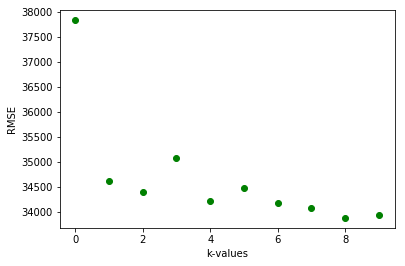

In [55]:
x = range(0,10)
rmses = []
for i in range(10):
    rmse = train_and_test(df,\
            total_final_features,target="SalePrice",k=i)
    rmses.append(rmse)

plt.scatter(x,rmses,color="g")
plt.xlabel("k-values")
plt.ylabel("RMSE")
plt.show()